# Customer segmentation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from cluster_functions import *
from plotting import *

from sklearn.metrics import pairwise_distances_argmin_min

%load_ext autoreload
%autoreload 2

In [2]:
invoices = pd.read_csv("invoices_2009_2011_no_returns.csv", low_memory=False)
invoices['InvoiceDate'] = pd.to_datetime(invoices['InvoiceDate'])
invoices.dropna(inplace=True)

In [3]:
# Cohort are customers who made their first purchase in the first year
cohort_customer_ids = invoices[invoices.InvoiceDate<'2010-12-1'].CustomerID.unique()
cohort_invoices = invoices[invoices.CustomerID.isin(cohort_customer_ids)]

<br>
<br>

# Cluster on RFM features

**KMeans**

In [4]:
features = get_money_aggregation_features(cohort_invoices[cohort_invoices.InvoiceDate<'2010-12-1'])
features = get_rfm_features(features, cohort_invoices[cohort_invoices.InvoiceDate<'2010-12-1'])
features = get_total_first_year_revenue(features, cohort_invoices[cohort_invoices.InvoiceDate<'2010-12-1'])
features = get_second_year_rlv(features, cohort_invoices[cohort_invoices.InvoiceDate>='2010-12-1'])
features.head()

,CustomerID,MeanPurchaseValue,StDevPurchaseValue,MinPurchaseValue,MaxPurchaseValue,SumPurchaseValue,SizePurchaseValue,frequency,recency,T,monetary_value,T_Minus_Recency,TotalFirstYearRevenue,log(1+TotalFirstYearRevenue),SecondYearRLV
0,12346.0,84.680000,81.501128,27.05,142.31,169.36,2,1.0,118.0,273.0,142.310,155.0,169.36,5.137914,77183.60
1,12349.0,1110.570000,59.467680,1068.52,1152.62,2221.14,2,1.0,182.0,215.0,1152.620,30.0,2221.14,7.706226,1457.55
2,12352.0,171.900000,39.810112,143.75,200.05,343.80,2,1.0,17.0,18.0,200.050,64.0,343.80,5.842965,1385.74
3,12356.0,1042.083333,840.956062,349.85,1977.96,3126.25,3,2.0,44.0,50.0,1163.905,33.0,3126.25,8.047909,2487.43
4,12358.0,839.670000,581.088065,268.10,1429.83,2519.01,3,2.0,356.0,357.0,544.590,1.0,2519.01,7.832018,928.06


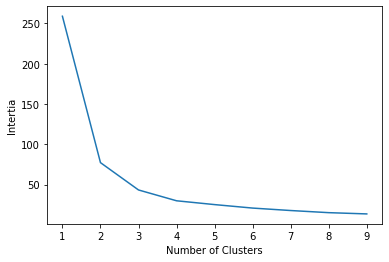

In [5]:
cluster_feats = [
    'recency',
    'frequency',
    'monetary_value'   
]

cluster_elbow_method(features, cluster_feats, scaler='mm')

Inertia for 4 clusters: 29.965902439427225
Cluster labels - 0 = Low value customer, 4 = High value customer
Silhouette Coefficient: 0.5023716033245386
Median 2nd year RLV: [(0, 282.17499999999995), (1, 397.29), (2, 720.5200000000001), (3, 1735.18)]
Differences: [9.278601045260302, 160.32044088932162, 3673.5329546814764]
Value Counts:
0    584
1    671
2    735
3    757
Name: Cluster, dtype: int64
Explained variance ratio: [0.93689441 0.03653677]
Total explained variance: 0.9734311837519659


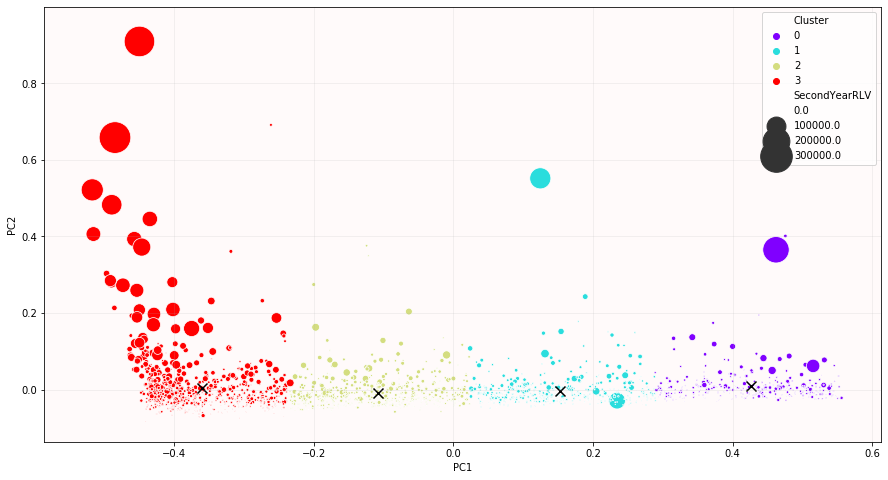

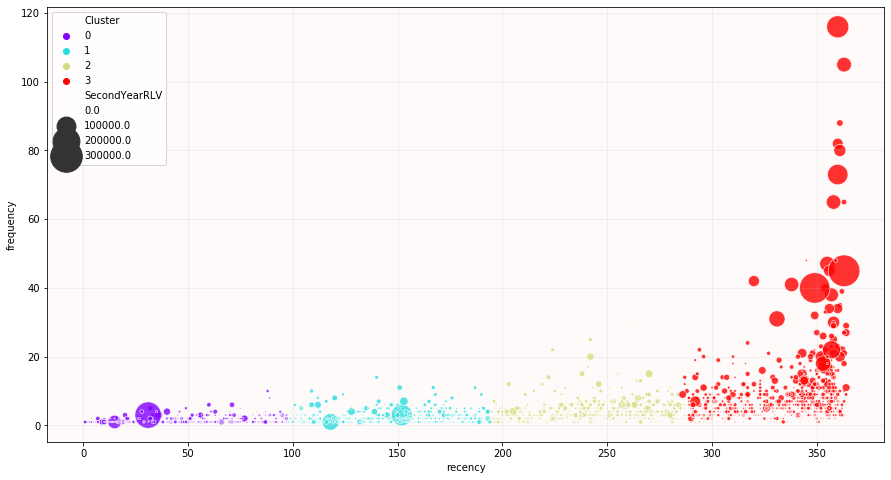

In [6]:
num_clusters = 4
features, scaler, cluster_centers  = perform_km_clustering(features, cluster_feats, num_clusters, scaler='mm')
features, sorted_cluster_centers = reorder_clusters(features, cluster_centers, num_clusters)
evaluate_clusters(features, num_clusters, cluster_feats, scaler)
pca = cluster_pca_plot(features, cluster_feats, scaler, sorted_cluster_centers)
# tsne = cluster_tsne_plot(features, cluster_feats, scaler, perplexity=40)
cluster_rf_plot(features)

<br>
<br>

**GMM**

In [7]:
features = get_money_aggregation_features(cohort_invoices[cohort_invoices.InvoiceDate<'2010-12-1'])
features = get_rfm_features(features, cohort_invoices[cohort_invoices.InvoiceDate<'2010-12-1'])
features = get_total_first_year_revenue(features, cohort_invoices[cohort_invoices.InvoiceDate<'2010-12-1'])
features = get_second_year_rlv(features, cohort_invoices[cohort_invoices.InvoiceDate>='2010-12-1'])
features.head()

,CustomerID,MeanPurchaseValue,StDevPurchaseValue,MinPurchaseValue,MaxPurchaseValue,SumPurchaseValue,SizePurchaseValue,frequency,recency,T,monetary_value,T_Minus_Recency,TotalFirstYearRevenue,log(1+TotalFirstYearRevenue),SecondYearRLV
0,12346.0,84.680000,81.501128,27.05,142.31,169.36,2,1.0,118.0,273.0,142.310,155.0,169.36,5.137914,77183.60
1,12349.0,1110.570000,59.467680,1068.52,1152.62,2221.14,2,1.0,182.0,215.0,1152.620,30.0,2221.14,7.706226,1457.55
2,12352.0,171.900000,39.810112,143.75,200.05,343.80,2,1.0,17.0,18.0,200.050,64.0,343.80,5.842965,1385.74
3,12356.0,1042.083333,840.956062,349.85,1977.96,3126.25,3,2.0,44.0,50.0,1163.905,33.0,3126.25,8.047909,2487.43
4,12358.0,839.670000,581.088065,268.10,1429.83,2519.01,3,2.0,356.0,357.0,544.590,1.0,2519.01,7.832018,928.06


Cluster labels - 0 = Low value customer, 4 = High value customer
Silhouette Coefficient: 0.008656478443390113
Median 2nd year RLV: [(0, 194.88), (1, 598.1999999999998), (2, 2560.0), (3, 7832.469999999998)]
Differences: [347.17856853896717, 2188.4130214710576, 17401.371586016438]
Value Counts:
0     821
1    1220
2     565
3     141
Name: Cluster, dtype: int64
Explained variance ratio: [0.93689441 0.03653677]
Total explained variance: 0.9734311837519665


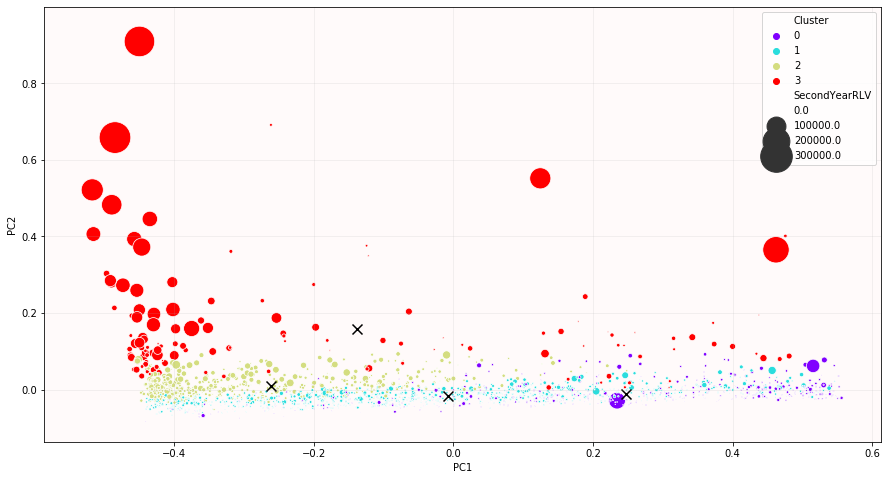

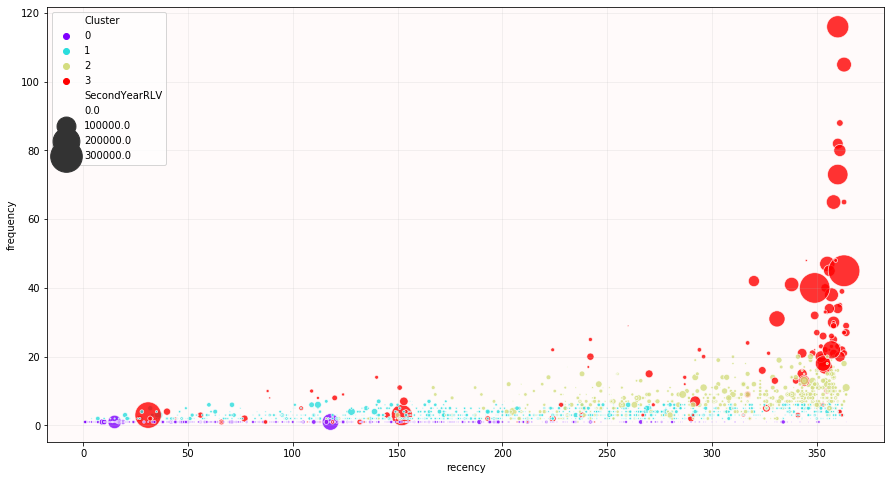

In [8]:
num_clusters = 4
features, scaler, cluster_centers  = perform_gmm_clustering(features, cluster_feats, num_clusters, scaler='mm')
features, sorted_cluster_centers = reorder_clusters(features, cluster_centers, num_clusters)
evaluate_clusters(features, num_clusters, cluster_feats, scaler)
pca = cluster_pca_plot(features, cluster_feats, scaler, sorted_cluster_centers)
# tsne = cluster_tsne_plot(features, cluster_feats, scaler, perplexity=40)
cluster_rf_plot(features)

<br>
<br>

# Cluster on monetary aggregation features

**KMeans**

In [9]:
features = get_money_aggregation_features(cohort_invoices[cohort_invoices.InvoiceDate<'2010-12-1'])
features = get_rfm_features(features, cohort_invoices[cohort_invoices.InvoiceDate<'2010-12-1'])
features = get_total_first_year_revenue(features, cohort_invoices[cohort_invoices.InvoiceDate<'2010-12-1'])
features = get_second_year_rlv(features, cohort_invoices[cohort_invoices.InvoiceDate>='2010-12-1'])

feats_to_transform = [
    'MeanPurchaseValue', 
    'StDevPurchaseValue',
    'MinPurchaseValue', 
    'MaxPurchaseValue', 
    'SumPurchaseValue', 
]

features = log_transform_features(features, feats_to_transform)

features.head()

,CustomerID,log(1+MeanPurchaseValue),log(1+StDevPurchaseValue),log(1+MinPurchaseValue),log(1+MaxPurchaseValue),log(1+SumPurchaseValue),SizePurchaseValue,frequency,recency,T,monetary_value,T_Minus_Recency,TotalFirstYearRevenue,log(1+TotalFirstYearRevenue),SecondYearRLV
0,12346.0,4.450619,4.412812,3.333989,4.965010,5.137914,2,1.0,118.0,273.0,142.310,155.0,169.36,5.137914,77183.60
1,12349.0,7.013529,4.102109,6.974965,7.050660,7.706226,2,1.0,182.0,215.0,1152.620,30.0,2221.14,7.706226,1457.55
2,12352.0,5.152713,3.708930,4.975008,5.303554,5.842965,2,1.0,17.0,18.0,200.050,64.0,343.80,5.842965,1385.74
3,12356.0,6.949936,6.735728,5.860359,7.590327,8.047909,3,2.0,44.0,50.0,1163.905,33.0,3126.25,8.047909,2487.43
4,12358.0,6.734199,6.366622,5.595083,7.266010,7.832018,3,2.0,356.0,357.0,544.590,1.0,2519.01,7.832018,928.06


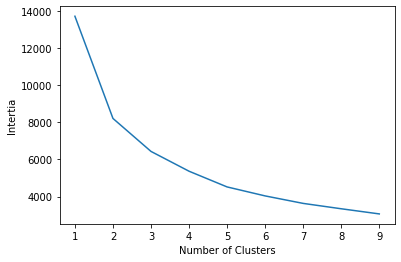

In [10]:
cluster_feats = [
    'log(1+MeanPurchaseValue)',
    'log(1+StDevPurchaseValue)',
    'log(1+MinPurchaseValue)',
    'log(1+MaxPurchaseValue)',
    'log(1+SumPurchaseValue)',
]
cluster_elbow_method(features, cluster_feats, scaler='normal')

Inertia for 4 clusters: 5366.066116102085
Cluster labels - 0 = Low value customer, 4 = High value customer
Silhouette Coefficient: 0.31871843473698724
Median 2nd year RLV: [(0, 178.95000000000002), (1, 699.855), (2, 1098.15), (3, 3023.585)]
Differences: [745.8037306242414, 709.6875628521097, 6621.501665607117]
Value Counts:
0     705
1    1332
2     242
3     468
Name: Cluster, dtype: int64
Explained variance ratio: [0.70105714 0.20946052]
Total explained variance: 0.9105176604972639


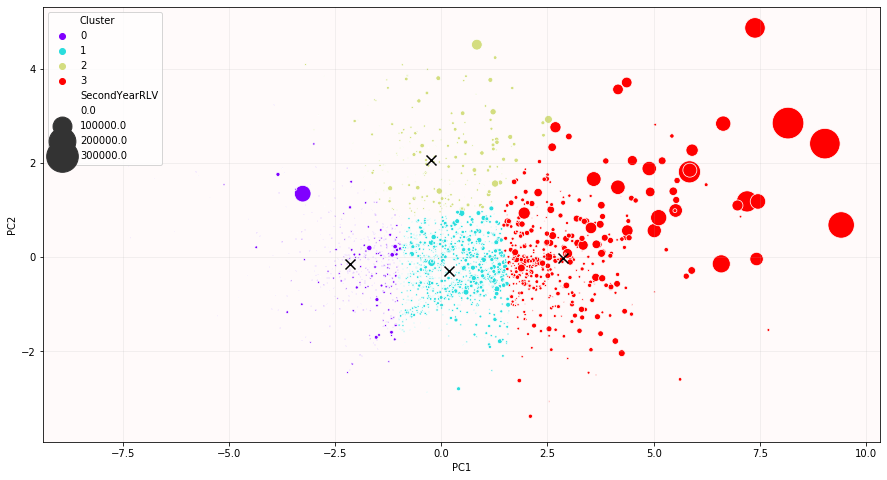

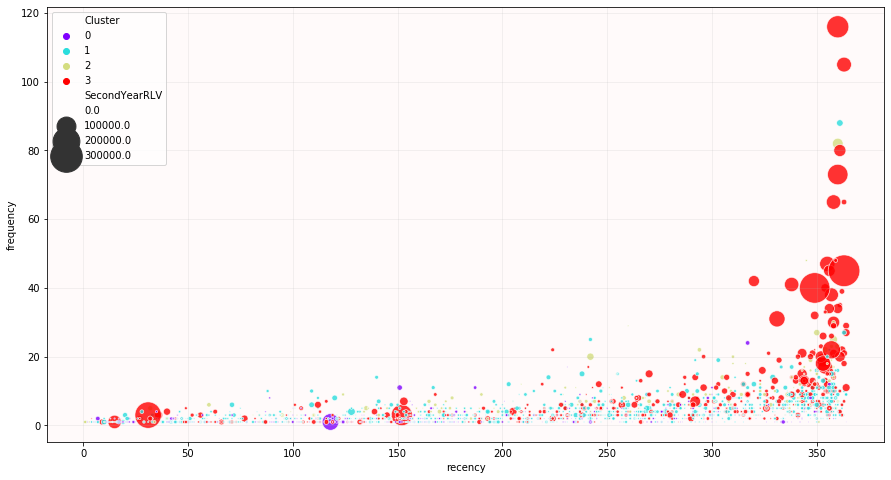

In [11]:
num_clusters = 4
features, scaler, cluster_centers  = perform_km_clustering(features, cluster_feats, num_clusters, scaler='normal')
features, sorted_cluster_centers = reorder_clusters(features, cluster_centers, num_clusters)
evaluate_clusters(features, num_clusters, cluster_feats, scaler)
pca = cluster_pca_plot(features, cluster_feats, scaler, sorted_cluster_centers)
# tsne = cluster_tsne_plot(features, cluster_feats, scaler, perplexity=40, n_iter=2000)
cluster_rf_plot(features)

<br>
<br>

**GMM**

In [12]:
features = get_money_aggregation_features(cohort_invoices[cohort_invoices.InvoiceDate<'2010-12-1'])
features = get_rfm_features(features, cohort_invoices[cohort_invoices.InvoiceDate<'2010-12-1'])
features = get_total_first_year_revenue(features, cohort_invoices[cohort_invoices.InvoiceDate<'2010-12-1'])
features = get_second_year_rlv(features, cohort_invoices[cohort_invoices.InvoiceDate>='2010-12-1'])

feats_to_transform = [
    'MeanPurchaseValue', 
    'StDevPurchaseValue',
    'MinPurchaseValue', 
    'MaxPurchaseValue', 
    'SumPurchaseValue',
    'SizePurchaseValue'
]

features = log_transform_features(features, feats_to_transform)

features.head()

,CustomerID,log(1+MeanPurchaseValue),log(1+StDevPurchaseValue),log(1+MinPurchaseValue),log(1+MaxPurchaseValue),log(1+SumPurchaseValue),log(1+SizePurchaseValue),frequency,recency,T,monetary_value,T_Minus_Recency,TotalFirstYearRevenue,log(1+TotalFirstYearRevenue),SecondYearRLV
0,12346.0,4.450619,4.412812,3.333989,4.965010,5.137914,1.098612,1.0,118.0,273.0,142.310,155.0,169.36,5.137914,77183.60
1,12349.0,7.013529,4.102109,6.974965,7.050660,7.706226,1.098612,1.0,182.0,215.0,1152.620,30.0,2221.14,7.706226,1457.55
2,12352.0,5.152713,3.708930,4.975008,5.303554,5.842965,1.098612,1.0,17.0,18.0,200.050,64.0,343.80,5.842965,1385.74
3,12356.0,6.949936,6.735728,5.860359,7.590327,8.047909,1.386294,2.0,44.0,50.0,1163.905,33.0,3126.25,8.047909,2487.43
4,12358.0,6.734199,6.366622,5.595083,7.266010,7.832018,1.386294,2.0,356.0,357.0,544.590,1.0,2519.01,7.832018,928.06


Cluster labels - 0 = Low value customer, 4 = High value customer
Silhouette Coefficient: 0.05686216766781686
Median 2nd year RLV: [(0, 213.51999999999998), (1, 494.64), (2, 1611.5899999999997), (3, 1799.565)]
Differences: [407.46922849151235, 1301.4073067629029, 5642.283855426467]
Value Counts:
0    768
1    810
2    703
3    466
Name: Cluster, dtype: int64
Explained variance ratio: [0.62117211 0.23783554]
Total explained variance: 0.8590076498311338


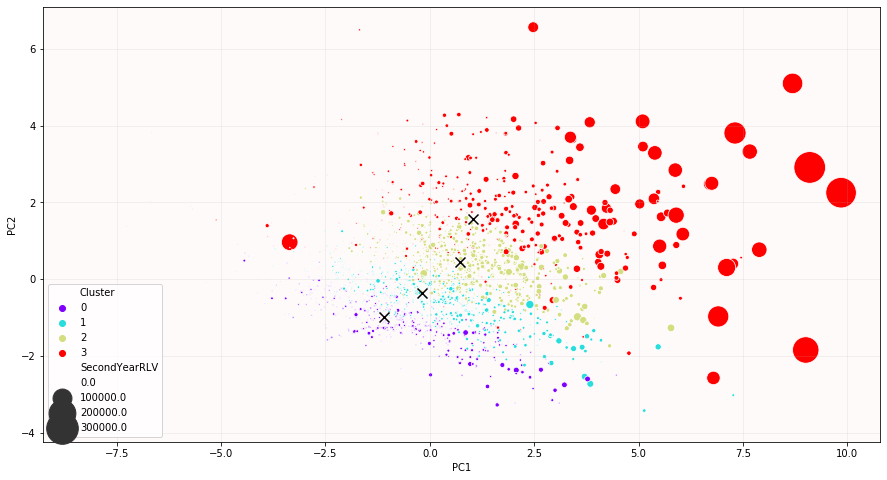

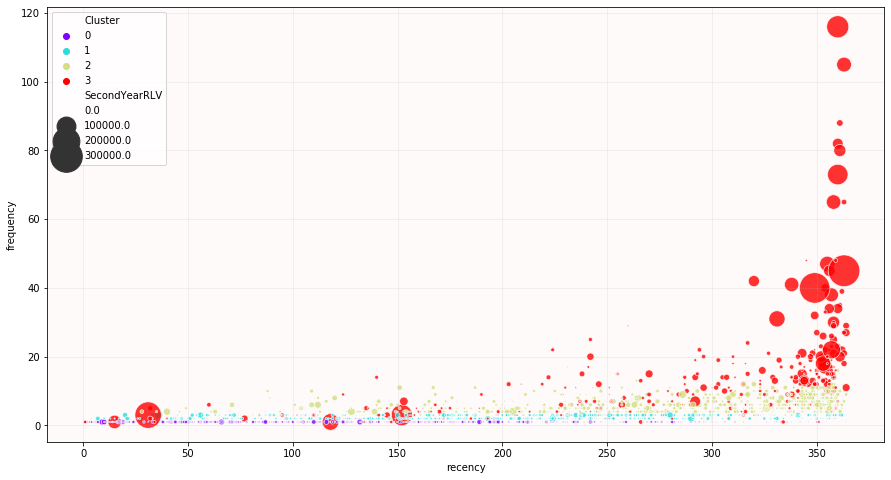

In [13]:
cluster_feats = [
    'log(1+MeanPurchaseValue)',
    'log(1+StDevPurchaseValue)',
    'log(1+MinPurchaseValue)',
    'log(1+MaxPurchaseValue)',
    'log(1+SumPurchaseValue)',
    'log(1+SizePurchaseValue)'
]

num_clusters = 4
features, scaler, cluster_centers  = perform_gmm_clustering(features, cluster_feats, num_clusters, scaler='normal')
features, sorted_cluster_centers = reorder_clusters(features, cluster_centers, num_clusters)
evaluate_clusters(features, num_clusters, cluster_feats, scaler)
pca = cluster_pca_plot(features, cluster_feats, scaler, sorted_cluster_centers)
# tsne = cluster_tsne_plot(features, cluster_feats, scaler, perplexity=40, n_iter=2000)
cluster_rf_plot(features)

<br>
<br>

# Pareto

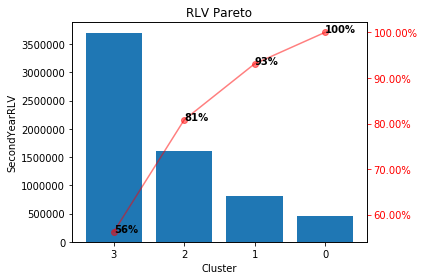

In [14]:
df = features.groupby('Cluster')['SecondYearRLV'].sum().reset_index()
df['Cluster'] = df['Cluster'].astype(str)
pareto_plot(df, x='Cluster', y='SecondYearRLV', show_pct_y=True, title='RLV Pareto')

<br>
<br>

# Cluster statistics and distributions

**Mean Cluster Features**

In [17]:
for cluster in range(num_clusters):
    print(f"Cluster: {cluster}")
    print(features[features.Cluster==cluster].mean())
    print()

Cluster: 0
CustomerID                      15279.216146
log(1+MeanPurchaseValue)            5.686087
log(1+StDevPurchaseValue)           4.089565
log(1+MinPurchaseValue)             5.426814
log(1+MaxPurchaseValue)             5.870074
log(1+SumPurchaseValue)             6.377116
log(1+SizePurchaseValue)            1.098612
frequency                           1.000000
recency                           118.455729
T                                 201.631510
monetary_value                    376.226615
T_Minus_Recency                    85.759115
TotalFirstYearRevenue             751.723112
log(1+TotalFirstYearRevenue)        6.377116
SecondYearRLV                     591.313451
Cluster                             0.000000
dtype: float64

Cluster: 1
CustomerID                      15288.703704
log(1+MeanPurchaseValue)            5.793323
log(1+StDevPurchaseValue)           4.697045
log(1+MinPurchaseValue)             5.282426
log(1+MaxPurchaseValue)             6.140666
log(1+SumPurchase

**Why log transform?**

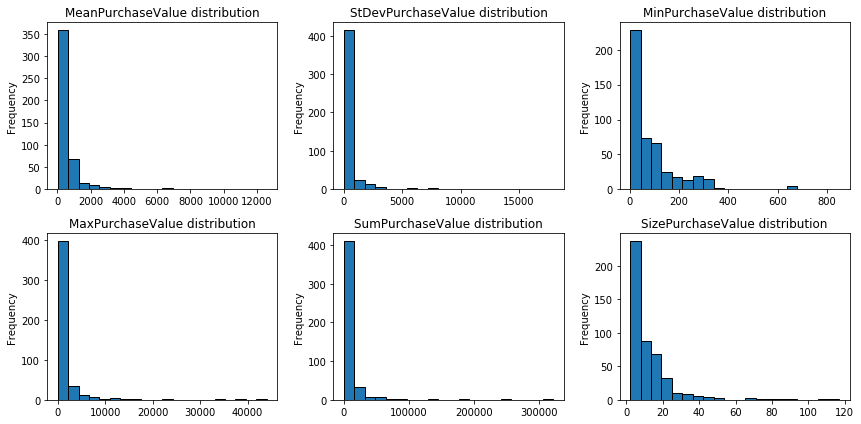

In [18]:
cluster = 3
fig = plt.figure(figsize=(12,6))
for idx, feat in enumerate(cluster_feats):
    ax = fig.add_subplot(2,3,idx+1)
    (np.exp(features[features.Cluster==cluster][feat])-1).plot.hist(bins=20, ax=ax, edgecolor='k')
    ax.set_title(f"{feat[6:-1]} distribution")
plt.tight_layout()

Before log transformations all of the monetary aggregation features are right skewed. This exaggerates the difference between the highest spending customers and those who are also relatively high spenders but don't spend as much which is undesirable. The clustering algorithms won't group these customers together unless the right side of the axis is "squashed" together which the log(1+X) transform achieves.  

<br>
<br>

**Typical Customer**

In [19]:
closest, _ = pairwise_distances_argmin_min(sorted_cluster_centers, scaler.transform(features[cluster_feats]))
closest

array([1210, 1002, 1775, 2414], dtype=int64)

In [20]:
typical_customers = []
for i in closest:
    typical_customers.append(features.iloc[i].CustomerID)
    print(features.iloc[i])

CustomerID                      14986.000000
log(1+MeanPurchaseValue)            5.650557
log(1+StDevPurchaseValue)           4.051255
log(1+MinPurchaseValue)             5.499297
log(1+MaxPurchaseValue)             5.781916
log(1+SumPurchaseValue)             6.341945
log(1+SizePurchaseValue)            1.098612
frequency                           1.000000
recency                           308.000000
T                                 310.000000
monetary_value                    243.520000
T_Minus_Recency                    74.000000
TotalFirstYearRevenue             566.900000
log(1+TotalFirstYearRevenue)        6.341945
SecondYearRLV                       0.000000
Cluster                             0.000000
Name: 1210, dtype: float64
CustomerID                      14538.000000
log(1+MeanPurchaseValue)            5.794628
log(1+StDevPurchaseValue)           4.819938
log(1+MinPurchaseValue)             5.336576
log(1+MaxPurchaseValue)             6.117216
log(1+SumPurchaseValue)     

In [21]:
daily_customer_revenues = cohort_invoices.groupby(["CustomerID", pd.Grouper(key='InvoiceDate', freq='D')])['Revenue'].sum().reset_index()

In [22]:
for customer in typical_customers:
    print(daily_customer_revenues[daily_customer_revenues.CustomerID==customer].to_string(index=False))
    print()

 CustomerID InvoiceDate  Revenue
    14986.0  2010-01-24   323.38
    14986.0  2010-11-28   243.52

 CustomerID InvoiceDate  Revenue
    14538.0  2010-01-25   452.60
    14538.0  2010-06-13   206.80
    14538.0  2010-06-27   323.19
    14538.0  2011-03-28   106.50
    14538.0  2011-10-06   281.75

 CustomerID InvoiceDate  Revenue
    16190.0  2009-12-14   196.92
    16190.0  2010-04-19   411.44
    16190.0  2010-05-28   378.61
    16190.0  2010-07-01   324.74
    16190.0  2010-08-13   280.13
    16190.0  2010-10-13   608.13
    16190.0  2010-11-10   308.50
    16190.0  2011-10-30   215.08

 CustomerID InvoiceDate  Revenue
    17526.0  2009-12-17   729.12
    17526.0  2010-01-21    54.95
    17526.0  2010-03-21   346.38
    17526.0  2010-06-09   543.80
    17526.0  2010-08-20   235.95
    17526.0  2010-10-12   327.30
    17526.0  2010-11-29   505.84
    17526.0  2010-12-09   226.80
    17526.0  2010-12-14    11.80
    17526.0  2011-02-22   634.20
    17526.0  2011-12-05   323.10



<br>
<br>